In [46]:
X = list(range(10))
Y = [1, 2, 3, 4, 5, 5, 8, 9, 9, 10]
print(len(Y))

print(len(X))

10
10


In [47]:
import matplotlib.pyplot as plt

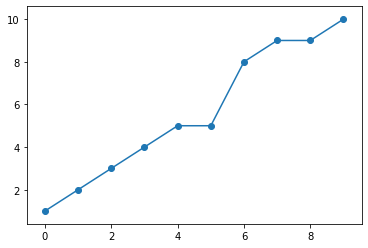

In [48]:
plt.plot(X, Y)
plt.scatter(X, Y)

In [49]:
class H():
    
    def __init__(self, w):
        self.w = w
    
    def forward(self, x):
        return self.w * x

def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i])- Y[i])** 2
    error = error / len(X)
    return error
        
h = H(4)
cost(h, X, Y)

226.2

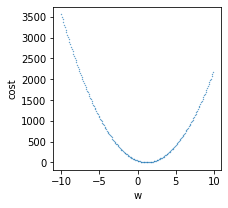

In [50]:
list_w = []
list_c = []
for i in range(-100, 100):
    w = i * 0.1
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    
plt.figure(figsize=(3, 3))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)

12.200285000041331 12.199999999999994
5.246122549973364 5.246000000000002
2.2558326964738917 2.255780000000005
0.9700080594976511 0.9699854000000068
0.41710346564416406 0.417093721999996
0.1793544901596 0.17935030045999376
0.07712243078605852 0.07712062919779897
0.03316264520769607 0.03316187055505075
0.014259937441973845 0.014259604338677434
0.006131773155892971 0.006131629865632959
0.002636662421728886 0.00263660084222721
0.0011337648930798139 0.0011337383621544462
0.0004875188364117377 0.0004875074957318759
0.000209633166381451 0.00020962822316619167
9.014219370939712e-05 9.014013596591042e-05
3.87611942542776e-05 3.876025847162623e-05
1.6667278668336394e-05 1.6666911144369578e-05
7.166900406474496e-06 7.1667717943313395e-06
3.081790378445248e-06 3.0817118691572888e-06
1.3251622021925866e-06 1.3251361071553446e-06
5.698219673888616e-07 5.698085228544869e-07
2.4504842599526455e-07 2.450176591395348e-07
1.0536016503692734e-07 1.0535759784602305e-07
4.535261055593764e-08 4.530377282208

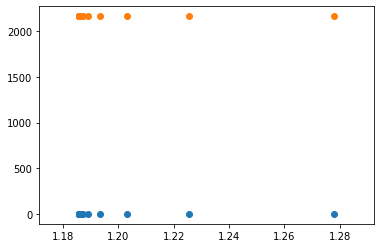

In [66]:
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001
    h = H(w + eps)
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2) * 0.5

def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    cost = cost(h, X, Y)
    return grad, c
    
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_w2 = []
list_c1 = []
list_c2 = []

for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)
    print(grad, grad2)
    
    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)